<a href="https://colab.research.google.com/github/mw2000/BaD-Certificate-Gen/blob/master/Protein%E2%80%93Protein_Interactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Analysis of Protein–Protein Interactions


This is a network of protein–protein interactions from PDZBase. It's a undirected, unipartite graph i.e one connected component

This dataset was obtained from: http://konect.cc/networks/maayan-pdzbase/

Reading in the dataset:

In [45]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
net = nx.read_adjlist("pdzbase/out.maayan-pdzbase")

### Nodes and Edges Present

In [30]:
print("Number of nodes:",net.number_of_nodes())
print("Number of edges:",net.number_of_edges())
print("Average degree:", net.number_of_edges()/net.number_of_nodes())

Number of nodes: 215
Number of edges: 246
Average degree: 1.1441860465116278


### Degree Distribution Graph

We see that this a log normal degree distribution on plotting the graph.

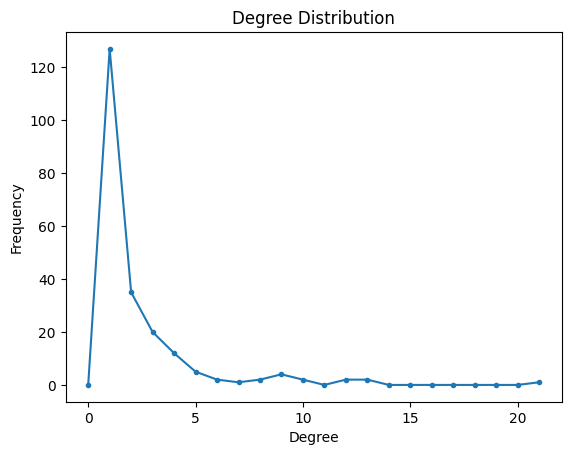

In [50]:
degrees = [net.degree(node) for node in net.nodes()]
degree_counts = nx.degree_histogram(net)

degrees_list = list(range(len(degree_counts)))
frequency_list = degree_counts


plt.plot(degrees_list, frequency_list, marker='.')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

### Drawing the network

Network drawn with color based on clustering coefficient

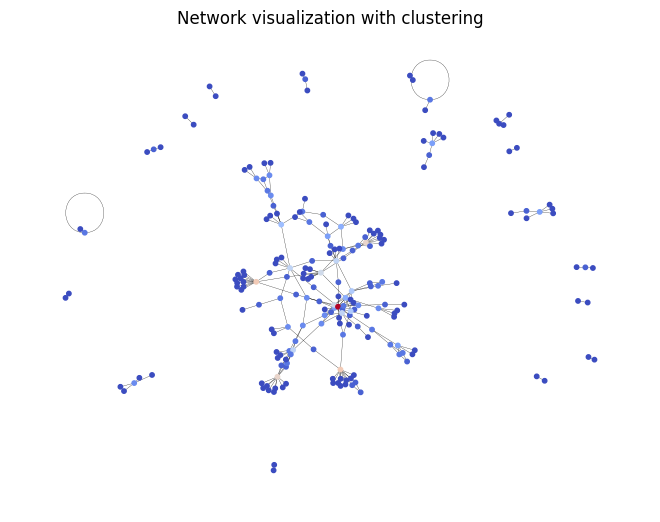

In [40]:
# compute degree centrality
deg_centrality = nx.degree_centrality(net) # returns a map from node to the centrality value
# turn the map into list of the values that we will use as colors
colors = [deg_centrality[node] for node in net.nodes()]

# Compute clustering coefficient for each node
clustering = nx.clustering(net)

# Normalize clustering coefficients to [0, 1] range
min_clustering = min(clustering.values())
max_clustering = max(clustering.values())
normalized_clustering = np.array([(clustering[node] - min_clustering) / (max_clustering - min_clustering) for node in net.nodes()])

nx.draw_spring(net, with_labels=False, node_size=10, width=0.2, node_color=colors, cmap='coolwarm')
plt.title("Network Visualization with Clustering")
plt.show()

### Finding communities in the network

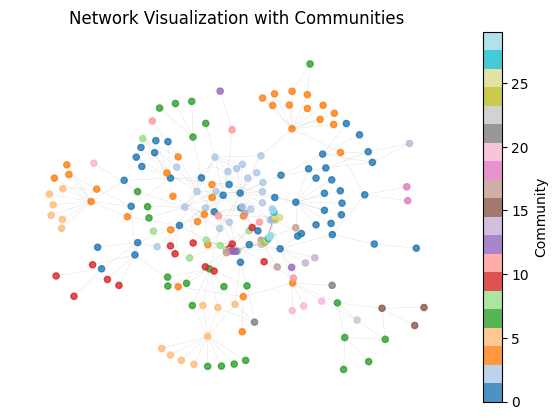

In [39]:

# Find communities using the Greedy Modularity algorithm
communities = list(nx.community.greedy_modularity_communities(net))
num_communities = len(communities)
community_sizes = [len(comm) for comm in communities]

# Draw nodes with colors based on communities
node_colors = [i for i, comm in enumerate(communities) for _ in comm]

# Plot the network graph with communities color-coded
pos = nx.kamada_kawai_layout(net)
nodes = nx.draw_networkx_nodes(net, pos, node_size=20, node_color=node_colors, cmap='tab20', alpha=0.8)
edges = nx.draw_networkx_edges(net, pos, width = 0.2, alpha = 0.2)
# plt.colorbar(nodes, label='Community')
plt.axis('off')  # Turn off axis labels and ticks
plt.title('Network Visualization with Communities')
# Add a colorbar
plt.colorbar(nodes, label='Community', fraction=0.046, pad=0.04)
plt.show()